# L4: Preprocessing PDFs and Images

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>


In [1]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [2]:
from unstructured_client import UnstructuredClient
from unstructured_client.models import shared
from unstructured_client.models.errors import SDKError

from unstructured.partition.html import partition_html
from unstructured.partition.pdf import partition_pdf

from unstructured.staging.base import dict_to_elements

In [3]:
from Utils import Utils
utils = Utils()

DLAI_API_KEY = utils.get_dlai_api_key()
DLAI_API_URL = utils.get_dlai_url()

s = UnstructuredClient(
    api_key_auth=DLAI_API_KEY,
    server_url=DLAI_API_URL,
)

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access Utils File and Helper Functions:</b> To access helper functions and other related files for this notebook, 1) click on the <em>"View"</em> option on the top menu of the notebook and then 2) click on <em>"File Browser"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>


## Example Document: News in PDF and HTML

### View the content of the files
- <a href="example_files/el_nino.pdf">El Nino (View PDF) -- Click Here</a>
- <a href="example_files/el_nino.html">El Nino (View HTML) -- Click Here</a>


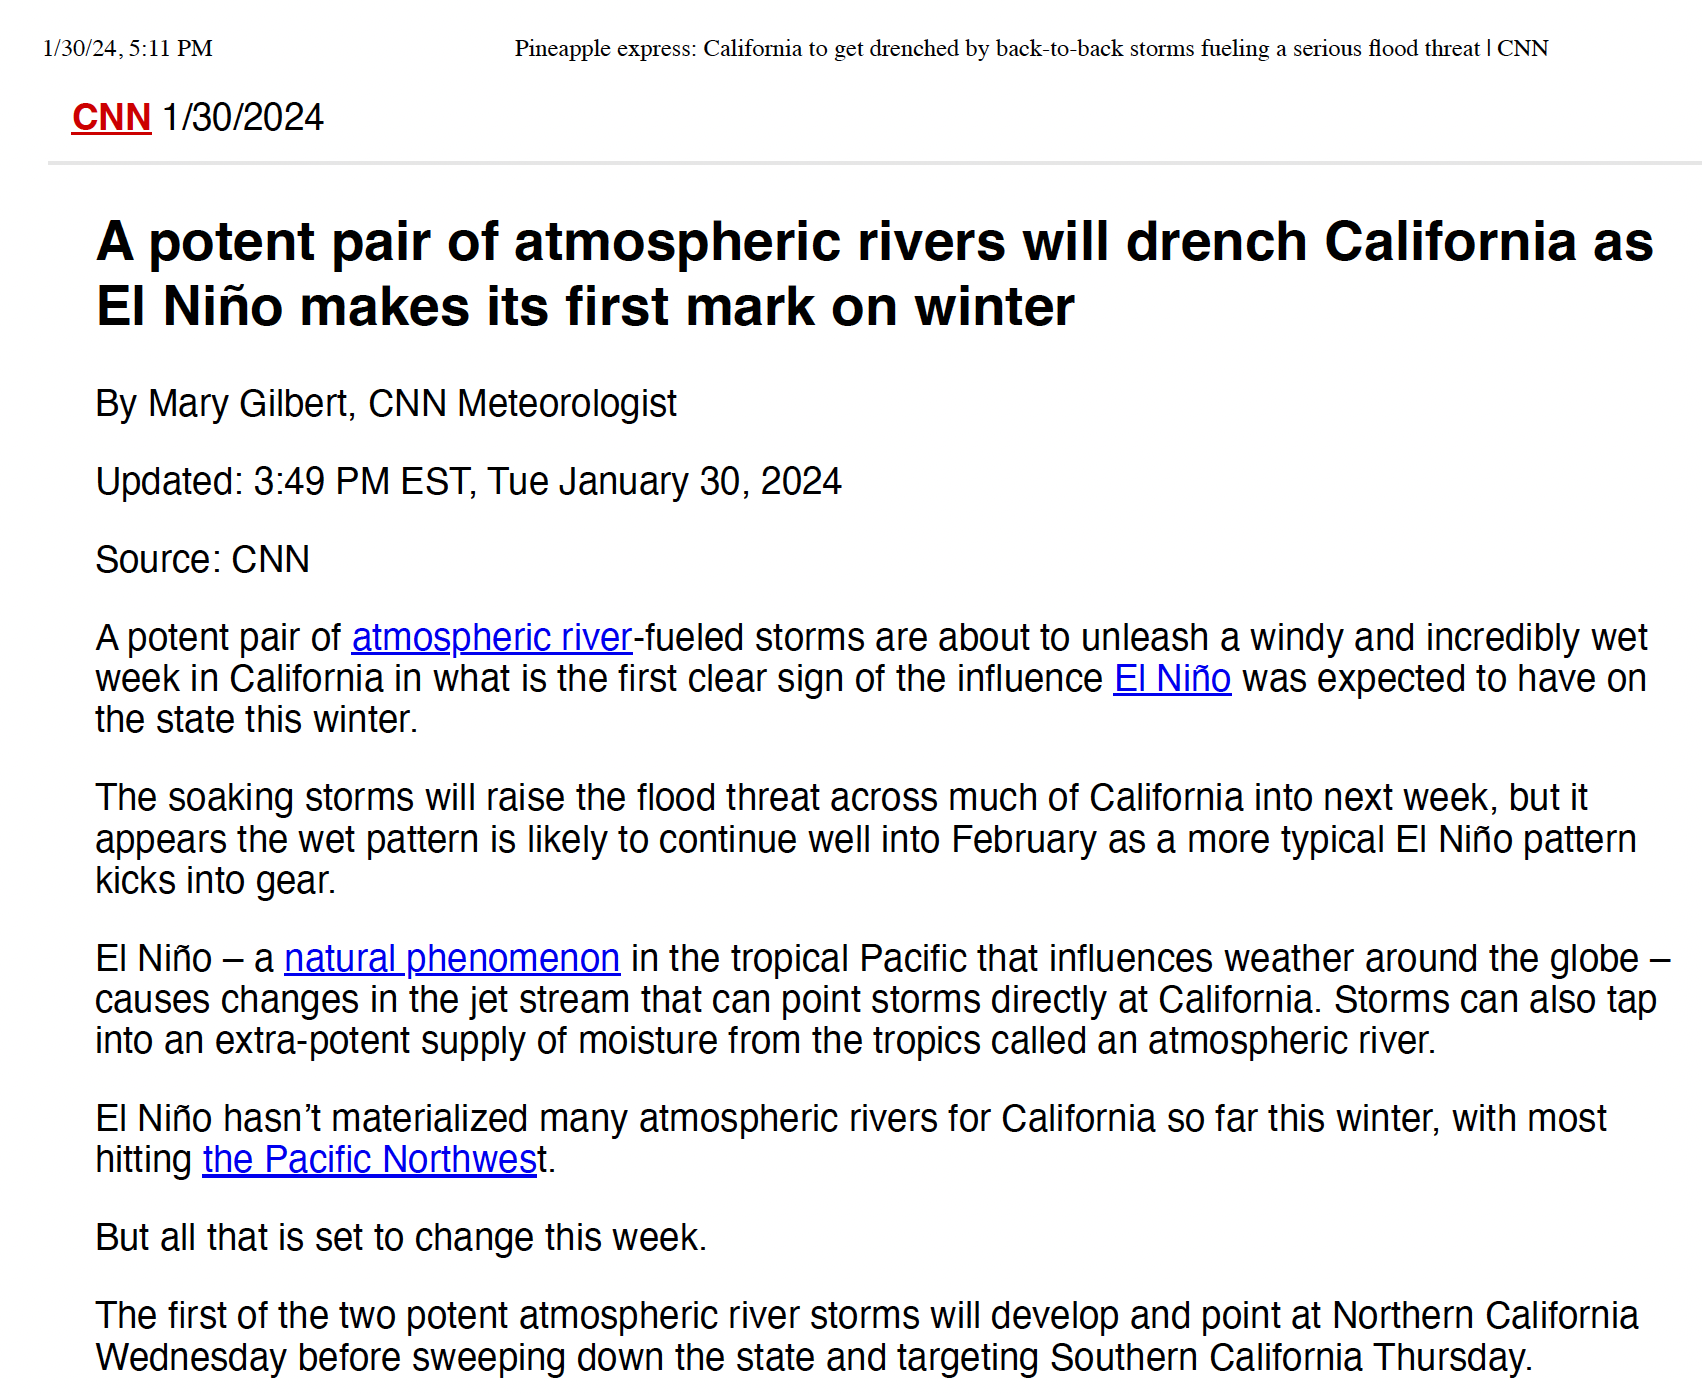

In [4]:
from IPython.display import Image
Image(filename="images/el_nino.png", height=600, width=600) 

## Process the Document as HTML

In [5]:
filename = "example_files/el_nino.html"
html_elements = partition_html(filename=filename)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [6]:
for element in html_elements[:10]:
    print(f"{element.category.upper()}: {element.text}")

TITLE: CNN
UNCATEGORIZEDTEXT: 1/30/2024
TITLE: A potent pair of atmospheric rivers will drench California as El Niño makes its first mark on winter
TITLE: By Mary Gilbert, CNN Meteorologist
UNCATEGORIZEDTEXT: Updated: 
        3:49 PM EST, Tue January 30, 2024
TITLE: Source: CNN
NARRATIVETEXT: A potent pair of atmospheric river-fueled storms are about to unleash a windy and incredibly wet week in California in what is the first clear sign of the influence El Niño was expected to have on the state this winter.
NARRATIVETEXT: The soaking storms will raise the flood threat across much of California into next week, but it appears the wet pattern is likely to continue well into February as a more typical El Niño pattern kicks into gear.
NARRATIVETEXT: El Niño – a natural phenomenon in the tropical Pacific that influences weather around the globe – causes changes in the jet stream that can point storms directly at California. Storms can also tap into an extra-potent supply of moisture from t

## Process the Document with Document Layout Detection

In [7]:
filename = "example_files/el_nino.pdf"
pdf_elements = partition_pdf(filename=filename, strategy="fast")

In [8]:
for element in pdf_elements[:10]:
    print(f"{element.category.upper()}: {element.text}")

UNCATEGORIZEDTEXT: 1/30/24, 5:11 PM
NARRATIVETEXT: Pineapple express: California to get drenched by back-to-back storms fueling a serious ﬂood threat | CNN
UNCATEGORIZEDTEXT: CNN 1/30/2024
NARRATIVETEXT: A potent pair of atmospheric rivers will drench California as El Niño makes its ﬁrst mark on winter
TITLE: By Mary Gilbert, CNN Meteorologist
TITLE: Updated: 3:49 PM EST, Tue January 30, 2024
TITLE: Source: CNN
NARRATIVETEXT: A potent pair of atmospheric river-fueled storms are about to unleash a windy and incredibly wet week in California in what is the ﬁrst clear sign of the inﬂuence El Niño was expected to have on the state this winter.
NARRATIVETEXT: The soaking storms will raise the ﬂood threat across much of California into next week, but it appears the wet pattern is likely to continue well into February as a more typical El Niño pattern kicks into gear.
NARRATIVETEXT: El Niño – a natural phenomenon in the tropical Paciﬁc that inﬂuences weather around the globe – causes changes 

In [9]:
with open(filename, "rb") as f:
    files=shared.Files(
        content=f.read(),
        file_name=filename,
    )

req = shared.PartitionParameters(
    files=files,
    strategy="hi_res",
    hi_res_model_name="yolox",
)

try:
    resp = s.general.partition(req)
    dld_elements = dict_to_elements(resp.elements)
except SDKError as e:
    print(e)

In [10]:
for element in dld_elements[:10]:
    print(f"{element.category.upper()}: {element.text}")

HEADER: 1/30/24, 5:11 PM
HEADER: CNN 1/30/2024
HEADER: Pineapple express: California to get drenched by back-to-back storms fueling a serious ﬂood threat | CNN
TITLE: A potent pair of atmospheric rivers will drench California as El Niño makes its ﬁrst mark on winter
NARRATIVETEXT: By Mary Gilbert, CNN Meteorologist
NARRATIVETEXT: Updated: 3:49 PM EST, Tue January 30, 2024
NARRATIVETEXT: Source: CNN
NARRATIVETEXT: A potent pair of atmospheric river-fueled storms are about to unleash a windy and incredibly wet week in California in what is the ﬁrst clear sign of the inﬂuence El Niño was expected to have on the state this winter.
NARRATIVETEXT: The soaking storms will raise the ﬂood threat across much of California into next week, but it appears the wet pattern is likely to continue well into February as a more typical El Niño pattern kicks into gear.
NARRATIVETEXT: El Niño – a natural phenomenon in the tropical Paciﬁc that inﬂuences weather around the globe – causes changes in the jet st

In [11]:
import collections

In [12]:
len(html_elements)

35

In [13]:
html_categories = [el.category for el in html_elements]
collections.Counter(html_categories).most_common()

[('NarrativeText', 23), ('Title', 10), ('UncategorizedText', 2)]

In [14]:
len(dld_elements)

39

In [15]:
dld_categories = [el.category for el in dld_elements]
collections.Counter(dld_categories).most_common()

[('NarrativeText', 28), ('Header', 6), ('Title', 4), ('Footer', 1)]

## Work With Your Own Files

In [16]:
import panel as pn
#import param
from Utils import upld_file
pn.extension()

upld_widget = upld_file()
pn.Row(upld_widget.widget_file_upload)

Row
    [0] FileInput(accept='.pdf,.ppt,.png,.html')

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 🖥 &nbsp; <b>Note:</b> If the file upload interface isn't functioning properly, the issue may be related to your browser version. In such a case, please ensure your browser is updated to the latest version, or try using a different browser.</p>


In [17]:
!ls ./example_files

'Transcript Grading Explanation.pdf'   el_nino.html   el_nino.pdf


<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Uploading Your Own File - Method 2:</b> To upload your own files, you can also 1) click on the <em>"View"</em> option on the top menu of the notebook and then 2) click on <em>"File Browser"</em>. Then 3) click on <em>"Upload"</em> button to upload your files. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>

In [18]:
with open('example_files/Transcript Grading Explanation.pdf', "rb") as f:
    files=shared.Files(
        content=f.read(),
        file_name=filename,
    )

req = shared.PartitionParameters(
    files=files,
    strategy="hi_res",
    hi_res_model_name="yolox",
)

try:
    resp = s.general.partition(req)
    dld_elements = dict_to_elements(resp.elements)
except SDKError as e:
    print(e)

In [19]:
for element in dld_elements[:10]:
    print(f"{element.category.upper()}: {element.text}")

TITLE: ACADEMIC TRANSCRIPT GRADING SCHEME
NARRATIVETEXT: I, EDWARD NDACHIMYA MAGAJI would like to provide explanations of the grading scheme(s) used in my academic transcript for my tertiary study at Modibbo Adama University, Yola (MAU). Currently, I am a graduate of Computer Science from Modibbo Adama University, Yola. It's important to note that my final certificates and official transcripts are not ready yet.
NARRATIVETEXT: Due to this, I was offered an unofficial transcript in advance of my graduation. My official transcript and certificates will be dispatched upon request directly from Modibbo Adama University.
NARRATIVETEXT: For your reference, the grading scheme at Modibbo Adama University is as follows:
NARRATIVETEXT: Grade A: 70 - 100 Grade B: 60 - 69 Grade C: 50 - 59 Grade D: 45 - 49 Grade F: 0 – 44
NARRATIVETEXT: This explanation should clarify the unique structure of my academic program, including the one-year internship during the fourth year, which resulted in a missing 4